# Advanced Lane Finding

In this project, I will setup an image processing pipeline including:
1. camera calibration and distortion correction
2. create a combination of methods (color transforms, gradients)
3. perform a perspective transform (transform an image to a birds-eye view)
4. locate the laneline pixels and fit their positions with a polynomial
5. calculate the curvature of the lane and the position of the vehicle 
6. warp back the rectified image to the original image

## Pipeline Setup

In [5]:
import numpy as np
import cv2
import glob
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
ROOT_PATH = '/home/downloads/carnd-p4-advanced-lane-lines'
CAMERA_CAL_PATH = Path(ROOT_PATH)/'camera_cal'
TEST_IMG_PATH = Path(ROOT_PATH)/'test_images'

### Camera Calibration and Distortion Correction


In [76]:
def calibrate_camera(img_path, nx=6, ny=9):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    img_size = None
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:ny, 0:nx].T.reshape(-1,2)

    # arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    for fname in img_path.glob('calibration*.jpg'):
        img = cv2.imread(fname.as_posix())
        if img_size is None:
            img_size = (img.shape[1], img.shape[0])
            print('img_size', img_size)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        # find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (ny, nx), None)

        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    
    # calibrate 
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    return mtx, dist

In [77]:
mtx, dist = calibrate_camera(CAMERA_CAL_PATH, nx=6, ny=9)

img_size (1280, 720)


In [81]:
def plot_undist(img_path, mtx, dist):
    img = cv2.imread(img_path)
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points
    #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #cv2.imwrite('calibration_wide/test_undist.jpg',dst)

    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    # dist_pickle = {}
    # dist_pickle["mtx"] = mtx
    # dist_pickle["dist"] = dist
    # pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.imshow(img_rgb)
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=20)
    plt.show()

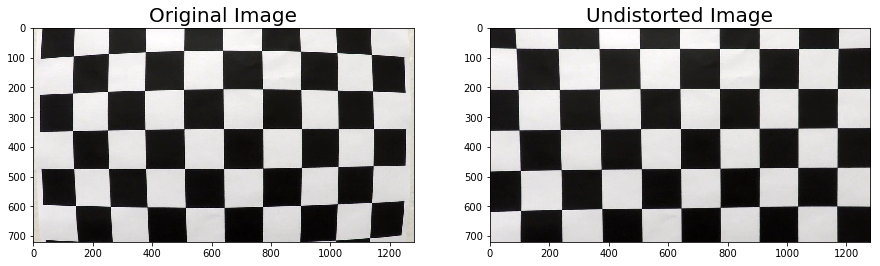

In [82]:
plot_undist((CAMERA_CAL_PATH/'calibration1.jpg').as_posix(), mtx, dist)

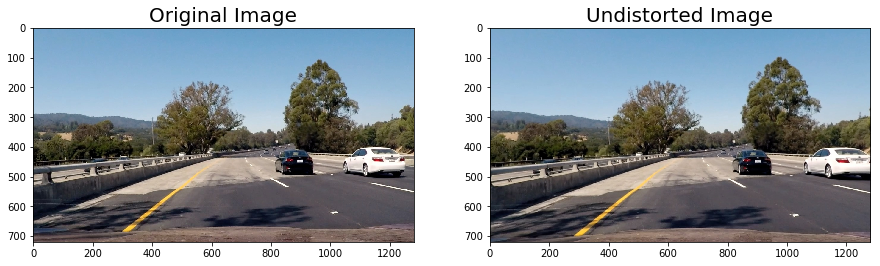

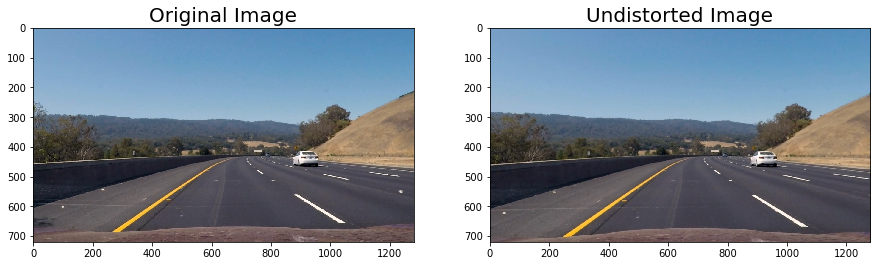

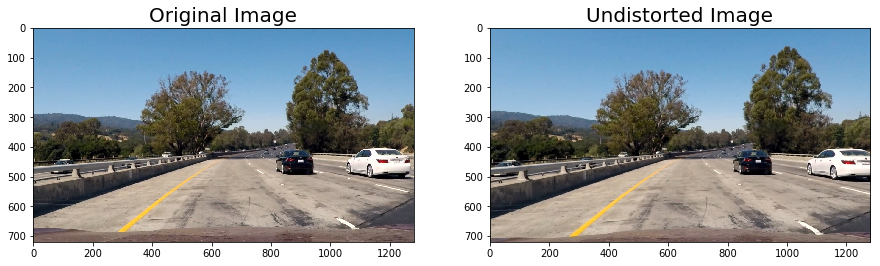

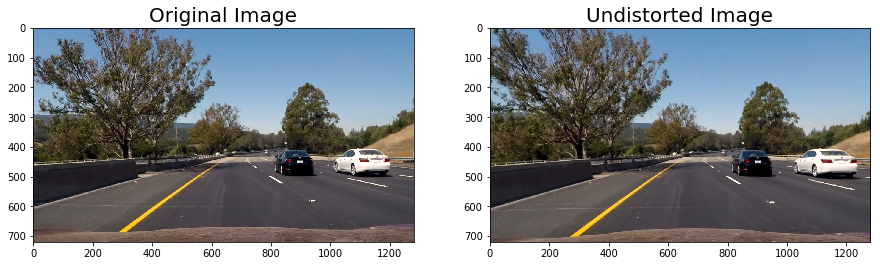

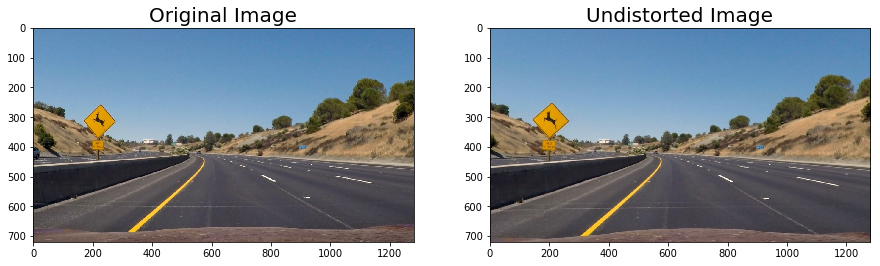

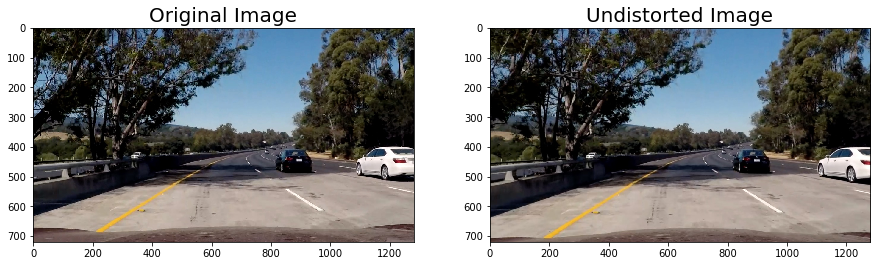

In [84]:
for img_path in TEST_IMG_PATH.glob('test*.jpg'):
    plot_undist(img_path.as_posix(), mtx, dist)